# ME 609 : Optimisational Methods in Engineering
##     Project - Phase 1 (Bounding Phase + Golden Section)

###   Nirmal S.   [234103107]
###   Rohit Kumar Saragadam [234103109]

In [2]:
import numpy as np
import pandas as pd

import math

import matplotlib.pyplot as plt

In [3]:
def boundingPhase(a, b, x, delta, minmax):
    
    #### STEP 2 ####
    f_x = objectiveFunction(df_bound.loc[0, 'x_k'], minmax)
    f_x_plus_delta  = objectiveFunction(df_bound.loc[0, 'x_k']+delta, minmax)
    f_x_minus_delta = objectiveFunction(df_bound.loc[0, 'x_k']-delta, minmax)

    if (f_x_minus_delta < f_x and f_x < f_x_plus_delta):
        delta = -delta

    k = 0
    df_bound.loc[k, 'f(x_k)'] = f_x

    while True:
        
        #### STEP 3 ####
        df_bound.loc[k, 'x_(k+1)'] = df_bound.loc[k, 'x_k'] + (2**k)*delta
        df_bound.loc[k, 'f(x_(k+1))'] = objectiveFunction(df_bound.loc[k, 'x_(k+1)'], minmax)
        
        # if new guess goes beyond 'b'
        if df_bound.loc[k, 'x_(k+1)'] > b:    
            df_bound.loc[k, 'x_(k+1)'] = b
            df_bound.loc[k, 'f(x_(k+1))'] = objectiveFunction(df_bound.loc[k, 'x_(k+1)'], minmax)
            df_bound.loc[k, 'Continue/Terminate'] = "Terminate"
            
            if df_bound.loc[k, 'f(x_(k+1))'] >= df_bound.loc[k, 'f(x_k)']:
                return df_bound.loc[k-1, 'x_k'], df_bound.loc[k, 'x_(k+1)']
            
            else:
                return df_bound.loc[k, 'x_k'], df_bound.loc[k, 'x_(k+1)']
            
        # if new guess goes below 'a'
        if df_bound.loc[k, 'x_(k+1)'] < a:    
            df_bound.loc[k, 'x_(k+1)'] = a
            df_bound.loc[k, 'f(x_(k+1))'] = objectiveFunction(df_bound.loc[k, 'x_(k+1)'], minmax)
            df_bound.loc[k, 'Continue/Terminate'] = "Terminate"
            
            if df_bound.loc[k, 'f(x_(k+1))'] >= df_bound.loc[k, 'f(x_k)']:
                return df_bound.loc[k-1, 'x_k'], df_bound.loc[k, 'x_(k+1)']
            
            else:
                return df_bound.loc[k, 'x_k'], df_bound.loc[k, 'x_(k+1)']
        
        #### STEP 4 ####
        if df_bound.loc[k, 'f(x_(k+1))'] >= df_bound.loc[k, 'f(x_k)']:
            df_bound.loc[k, 'Continue/Terminate'] = "Terminate"
            break

        df_bound.loc[k, 'Continue/Terminate'] = "Continue"
        k += 1
        df_bound.loc[k,'k'] = k
        df_bound.loc[k, 'x_k'] = df_bound.loc[k-1, 'x_(k+1)']
        df_bound.loc[k, 'f(x_k)'] = df_bound.loc[k-1, 'f(x_(k+1))']

    return df_bound.loc[k-1, 'x_k'], df_bound.loc[k, 'x_(k+1)']
    
    

In [4]:
def goldenSection(a1, b1, df_gold, epsilon, minmax):
           
        k = 0
        df_gold.loc[k, 'aw'] = 0
        df_gold.loc[k, 'bw'] = 1

        while True:
            df_gold.loc[k, 'lw'] = df_gold.loc[k, 'bw'] - df_gold.loc[k, 'aw']
            df_gold.loc[k, 'w1'] = df_gold.loc[k, 'aw'] + 0.618*df_gold.loc[k, 'lw']
            df_gold.loc[k, 'w2'] = df_gold.loc[k, 'bw'] - 0.618*df_gold.loc[k, 'lw']

            df_gold.loc[k, 'f(w1)'] = objectiveFunction(a1 + (b1 - a1)*df_gold.loc[k, 'w1'], minmax)
            df_gold.loc[k, 'f(w2)'] = objectiveFunction(a1 + (b1 - a1)*df_gold.loc[k, 'w2'], minmax)

            if df_gold.loc[k, 'lw']<=epsilon:
                df_gold.loc[k, 'Continue/Terminate'] = "Terminate"
                break

            df_gold.loc[k, 'Continue/Terminate'] = "Continue"

            if df_gold.loc[k, 'f(w1)'] < df_gold.loc[k, 'f(w2)']:
                df_gold.loc[k+1, 'aw'] = df_gold.loc[k, 'w2']
                df_gold.loc[k+1, 'bw'] = df_gold.loc[k, 'bw']

            else:
                df_gold.loc[k+1, 'aw'] = df_gold.loc[k, 'aw']
                df_gold.loc[k+1, 'bw'] = df_gold.loc[k, 'w1']

            k += 1

        if df_gold.loc[k, 'f(w1)'] < df_gold.loc[k, 'f(w2)']:
            return a1 + (b1 - a1)*df_gold.loc[k, 'w2'], a1 + (b1 - a1)*df_gold.loc[k, 'bw']

        else:
            return a1 + (b1 - a1)*df_gold.loc[k, 'aw'], a1 + (b1 - a1)*df_gold.loc[k, 'w1']

In [11]:
def objectiveFunction(x, minmax):
    

#     f =  (2*x-5)**4 - (x**2-1)**3
#    f =  8 + x**3 -2*x -2*math.exp(x)
#     f =  4*x*math.sin(x)
    f =  2*(x-3)**2 + math.exp(0.5*x**2)
#     f =  x**2 - 10*math.exp(0.1*x)
#     f =  20*math.sin(x) - 15*x**2

    if (minmax==1):
        return f
    
    return -f
    

In [12]:
# Taking Values from the user for question number and boundary

while True:
    try:
        minmax = int(input("Select a values \n[1] Minimise Function\n[2] Maximise Function\n"))
        if(minmax<1 or minmax>2):     # Checking if the number is in the range of questions given
            print("Number out of bound, please try again")
            continue
        break
    except ValueError:
        print("Please enter an integer")
        
        
# print("\n", end='\n')
print("Enter the boundary values")

while True:
    try:
        a = float(input("Left boundary (a): "))
        break
    except ValueError:
        print("Please enter a number")
        
while True:
    try:
        b = float(input("Right boundary (b): "))
        if b<=a:     # Checking if b<=a
            print("Right boundary must be greater than the left, please try again")
            continue
        break
    except ValueError:
        print("Please enter a number")

Select a values 
[1] Minimise Function
[2] Maximise Function
1
Enter the boundary values
Left boundary (a): -2
Right boundary (b): 3


In [13]:
# Taking the initial guess and the delta value from user
df_bound = pd.DataFrame(columns=['k', 'x_k', 'x_(k+1)', 'f(x_k)', 'f(x_(k+1))', 'Continue/Terminate'], dtype='float')

while True:
    try:
        x_in = float(input("Enter the initial guess x(0): "))
        if x_in<a or x_in>b:     # Checking initial guess in [a,b]
            print("Not in the range of [a, b], please try again")
            continue
        break
    except ValueError:
        print("Please enter a number")
        
while True:
    try:
        delta = float(input("Enter the delta for Bounding Phase  (delta): "))
        break
    except ValueError:
        print("Please enter a number")

df_bound.loc[0,'k'] = 0
df_bound.loc[0,'x_k'] = x_in

Enter the initial guess x(0): -1.99
Enter the delta for Bounding Phase  (delta): 0.11


In [14]:
# Calling Bracketing Method:
a1, b1 = boundingPhase(a, b, df_bound, delta, minmax)

print(round(a1,3), round(b1,3))

if minmax == 2:
    df_bound['f(x_k)'] = -df_bound['f(x_k)']
    df_bound['f(x_(k+1))'] = -df_bound['f(x_(k+1))']
    
df_bound

-0.34 3.0


,k,x_k,x_(k+1),f(x_k),f(x_(k+1)),Continue/Terminate
0,0.0,-1.99,-1.88,57.043305,53.483238,Continue
1,1.0,-1.88,-1.66,53.483238,47.397366,Continue
2,2.0,-1.66,-1.22,47.397366,37.721557,Continue
3,3.0,-1.22,-0.34,37.721557,23.370703,Continue
4,4.0,-0.34,1.42,23.370703,7.733463,Continue
5,5.0,1.42,3.00,7.733463,90.017131,Terminate


In [15]:
# Calling Based Method:
df_gold  = pd.DataFrame(columns=['aw', 'bw', 'lw', 'w1', 'w2', 'f(w1)', 'f(w2)', 'Continue/Terminate'], dtype='float')

epsilon = 10**(-3)
a2, b2 = goldenSection(a1, b1, df_gold, epsilon, minmax)


print(round(a2,5), round(b2,5))

if minmax == 2:
    df_gold['f(w1)'] = -df_gold['f(w1)']
    df_gold['f(w2)'] = -df_gold['f(w2)']
    
df_gold

1.59003 1.59154


,aw,bw,lw,w1,w2,f(w1),f(w2),Continue/Terminate
0,0.000000,1.000000,1.000000,0.618000,0.382000,7.676426,10.070688,Continue
1,0.382000,1.000000,0.618000,0.763924,0.618076,12.778374,7.677065,Continue
2,0.382000,0.763924,0.381924,0.618029,0.527895,7.676670,7.725829,Continue
3,0.527895,0.763924,0.236029,0.673761,0.618058,8.575809,7.676914,Continue
4,0.527895,0.673761,0.145866,0.618040,0.583616,7.676763,7.518801,Continue
5,0.527895,0.618040,0.090145,0.583605,0.562330,7.518790,7.537981,Continue
6,0.562330,0.618040,0.055710,0.596759,0.583612,7.549452,7.518797,Continue
7,0.562330,0.596759,0.034429,0.583607,0.575482,7.518793,7.516532,Continue
8,0.562330,0.583607,0.021277,0.575480,0.570458,7.516534,7.521161,Continue
9,0.570458,0.583607,0.013149,0.578584,0.575481,7.515950,7.516533,Continue


In [16]:
# Final Result:

if minmax==1: text_min_max = "Minimum" 
else: text_min_max =  "Maximum"

print("******* Result *******\n")    

print("From the Bounding Phase Method:")
print("Number of iterations: %d" %(len(df_bound)))
print("a = %.3f,  b = %.3f,  x(0) = %.3f,  delta = %0.3f" %(a, b, df_bound.loc[0,'x_k'], delta))
print("The region selected from Bounding Phase Method: (%0.4f, %0.4f)" %(a1, b1))


print("\n\nFrom the Golden Section Search Method:")
print("Number of iterations: %d" %(len(df_gold)))
print("a = %.4f,  b = %.4f,  epsilon = %.5f" %(a1, b1, epsilon))
print("The region selected from Golden Section Method: (%0.5f, %0.5f)" %(a2, b2))


******* Result *******

From the Bounding Phase Method:
Number of iterations: 6
a = -2.000,  b = 3.000,  x(0) = -1.990,  delta = 0.110
The region selected from Bounding Phase Method: (-0.3400, 3.0000)


From the Golden Section Search Method:
Number of iterations: 16
a = -0.3400,  b = 3.0000,  epsilon = 0.00100
The region selected from Golden Section Method: (1.59003, 1.59154)


In [15]:
## Data needed for the graph

x1 = df_bound['x_k'].append(pd.Series(df_bound.iloc[-1, 2])).reset_index(drop=True)
y1 = df_bound['f(x_k)'].append(pd.Series(df_bound.iloc[-1, 4])).reset_index(drop=True)

x2 = df_gold['w1'].apply(lambda x: a1 + (b1-a1)*x).append(df_gold['w2'].apply(lambda x: a1 + (b1-a1)*x)).reset_index(drop=True)
y2 = df_gold['f(w1)'].append(df_gold['f(w2)']).reset_index(drop=True)

x_plot_1 = np.linspace(a, b, 100)
y_plot_1 = np.linspace(a, b, 100)
for i in range(len(x_plot_1)):
    y_plot_1[i] = objectiveFunction(x_plot_1[i], 1)

x_plot_2 = np.linspace(a1, b1, 100)
y_plot_2 = np.linspace(a1, b1, 100)
for i in range(len(x_plot_2)):
    y_plot_2[i] = objectiveFunction(x_plot_2[i], 1)

f_a1 = objectiveFunction(a1, 1)
f_b1 = objectiveFunction(b1, 1)
f_a2 = objectiveFunction(a2, 1)
f_b2 = objectiveFunction(b2, 1)

x1_range = b - a
y1_range = max(y1) - min(y1)
x2_range = b1 - a1
y2_range = max(y2) - min(y2)

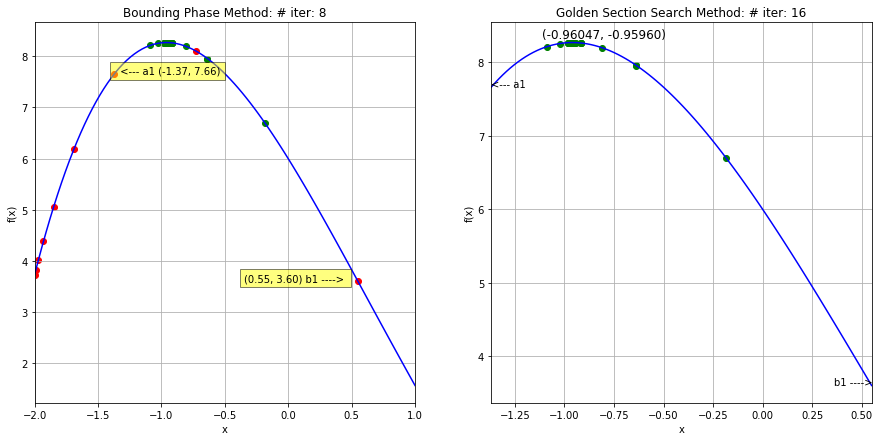

In [28]:
## Plotting the Graph for the search methods

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# Plot 1
plt.subplot(1, 2, 1)
plt.grid()

plt.plot(x_plot_1, y_plot_1, c="b")

plt.scatter(x1, y1, c="r")
plt.scatter(x2, y2, c="g")
plt.xlim(a, b)

plt.title("Bounding Phase Method: # iter: %d" %(len(df_bound)))
plt.xlabel("x")
plt.ylabel("f(x)")


plt.text(a1, f_a1, "  <--- a1 (%.2f, %.2f)" %(a1, f_a1), bbox=dict(facecolor='yellow', alpha=0.5))
plt.text(b1-x1_range*0.3, f_b1, "(%.2f, %.2f) b1 ----> "%(b1, f_b1), bbox=dict(facecolor='yellow', alpha=0.5))


# Plot 2
plt.subplot(1, 2, 2)
plt.grid()

plt.plot(x_plot_2, y_plot_2, c="b")

plt.scatter(x2, y2, c="g")
plt.xlim(a1, b1)

plt.title("Golden Section Search Method: # iter: %d" %(len(df_gold)))
plt.xlabel("x")
plt.ylabel("f(x)")

plt.text(a1, f_a1, "<--- a1")
plt.text(b1 - x2_range*0.1, f_b1, "b1 ----> ")

plt.text(a2 - x2_range*0.08, f_a2 + y2_range*0.04, "(%0.5f, %0.5f)" %(a2, b2), fontsize=12)

# plt.savefig("F2.jpg")

plt.show()


In [62]:
## Creating DataFrame for different initial guess

# df_out = pd.DataFrame(columns=['a', 'b', 'l', 'x(0)', 
#                                'delta',
#                                'Bounding Iterations',
#                                'a1', 'b1', 'l1',
#                                'epsilon', 
#                                'Golden Section Iterations', 
#                                'final_a', 'final_b', 'final_l'])

In [63]:
# df_out = pd.read_csv("Function_2.csv")

In [64]:
# df_temp = pd.DataFrame({'a': [a],
#                         'b': [b],
#                         'l': [b - a],
#                         'x(0)': [x_in],
                        
#                         'delta': [delta],
#                         'Bounding Iterations': [len(df_bound)],
#                         'a1': [a1],
#                         'b1': [b1],
#                         'l1': [b1 - a1],
                        
#                         'epsilon': [epsilon],
#                         'Golden Section Iterations': [len(df_gold)],
#                         'final_a': [a2],
#                         'final_b': [b2],
#                         'final_l': [b2 - a2]})

# df_out = df_out.append(df_temp).reset_index(drop=True)

In [68]:
# df_out.to_csv("Function_2.csv", index=False)

In [25]:
# df_out

In [24]:
# df_gold.to_csv("df_gold.csv", index=False)